### Diabetes Prediction Analysis Using Python
The objective of the dataset is to diagnostically predict
whether a patient has diabetes based on certain diagnostic measurements.

#### Importing Liabraries

In [2]:
#importing Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
from pandas.plotting import scatter_matrix

In [3]:
#Important Libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Reading data from csv file

In [4]:
#Loading dataset 
data = pd.read_csv('diabetes.csv')

In [5]:
# Top 5 Rows of the Dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Bottom 5 rows of the dataset
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
#Shape of dataset
data.shape

(768, 9)

In [8]:
print("Number of rows", data.shape[0])
print("Number of columns",data.shape[1])

Number of rows 768
Number of columns 9


#### Exploratory data analysis

In [9]:
#Total no. of columns in the dataset
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Informational about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#Checking Null Values In the dataset
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
#Overall Statistics About the Dataset with transpose
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
data1 = data.copy(deep=True)

In [14]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
data1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [16]:
#Checking for total null values
data1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Data Visuaization

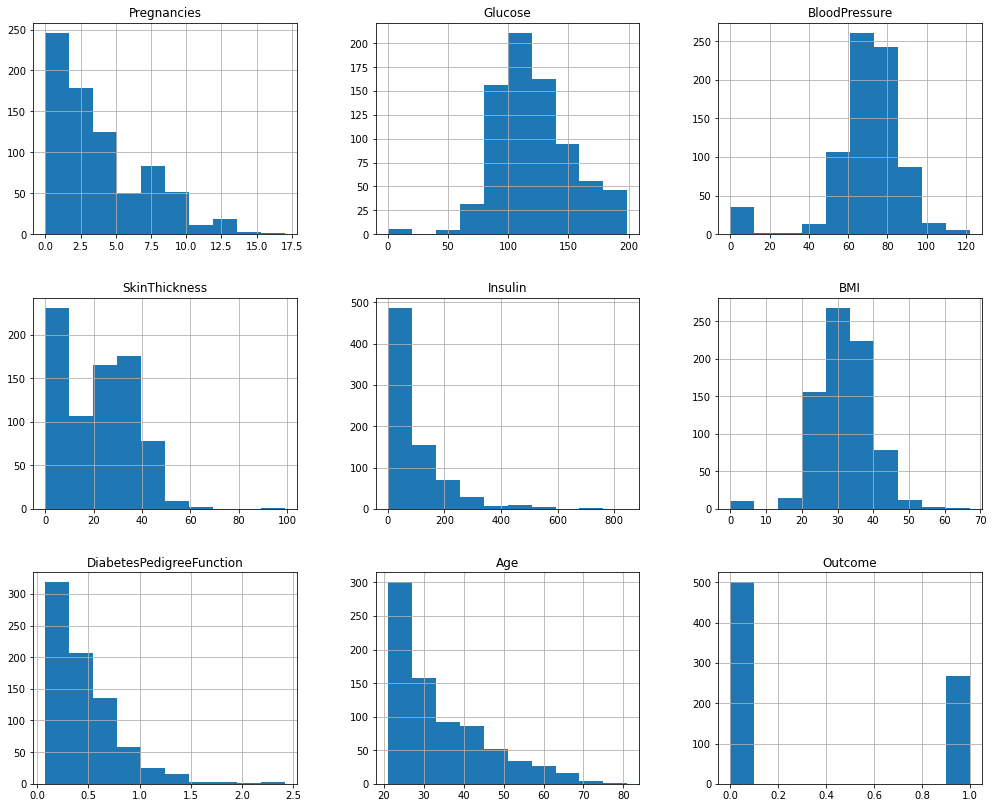

In [17]:
#Plotting the data distribution plots
data.hist(figsize=(17,14))
plt.show()

#### histograms to visually inspect the distribution of data features.

In [18]:
#Aiming to input NAN values for the column in accordance with their distribution 
data1['Glucose'].fillna(data1['Glucose'].mean(),inplace=True)
data1['BloodPressure'].fillna(data1['BloodPressure'].mean(),inplace=True)
data1['SkinThickness'].fillna(data1['SkinThickness'].mean(),inplace=True)
data1['Insulin'].fillna(data1['Insulin'].mean(),inplace=True)
data1['BMI'].fillna(data1['BMI'].mean(),inplace=True)

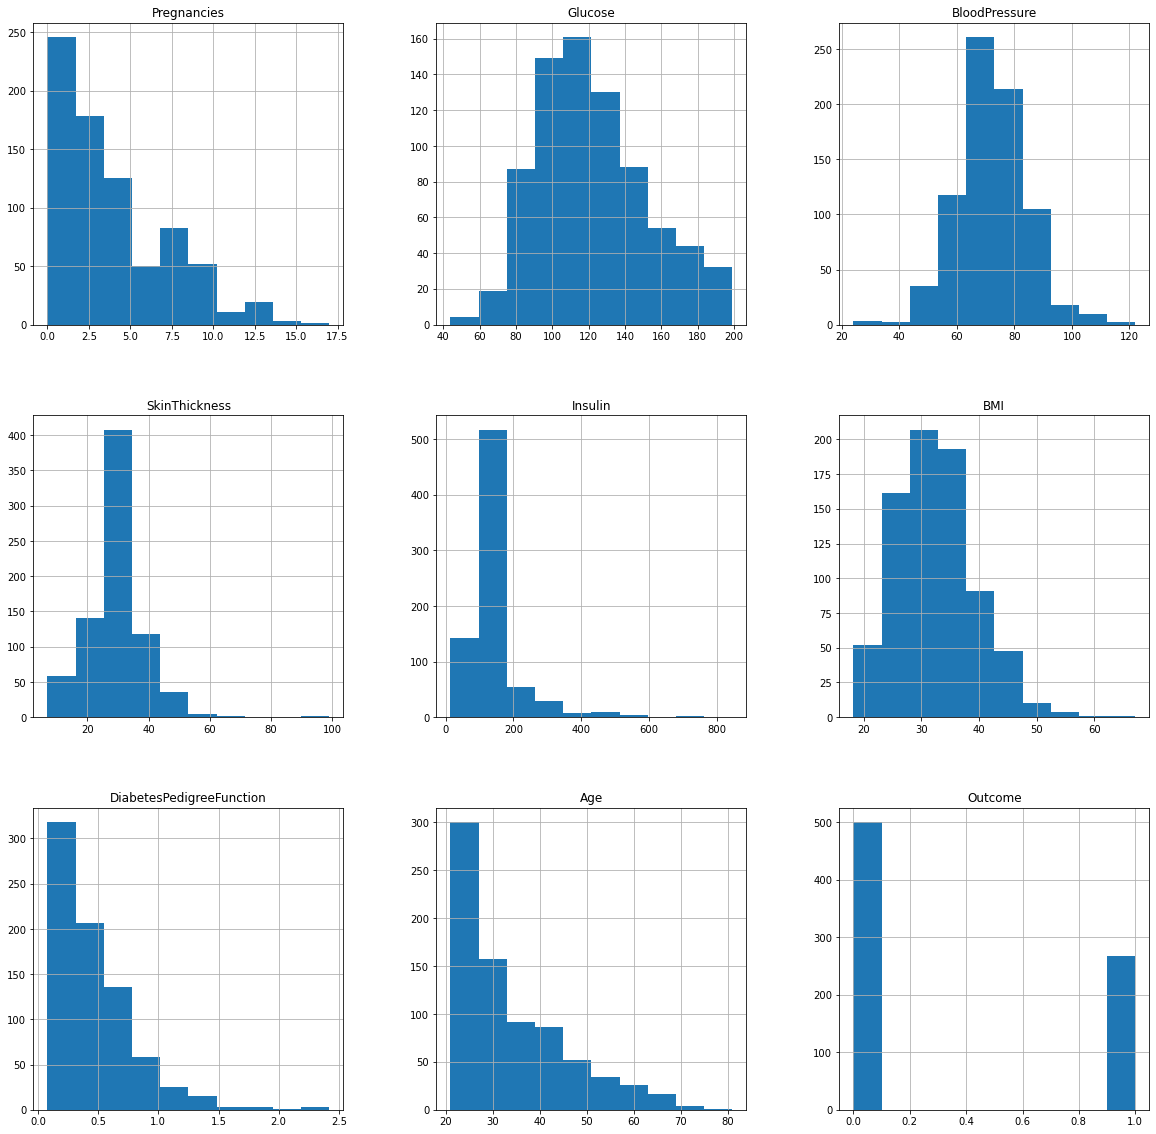

In [46]:
#Plotting the distribution after removing the NAN values
P = data1.hist(figsize=(20,20))

#### Visualizes the distribution of features in the dataset after removing missing values.

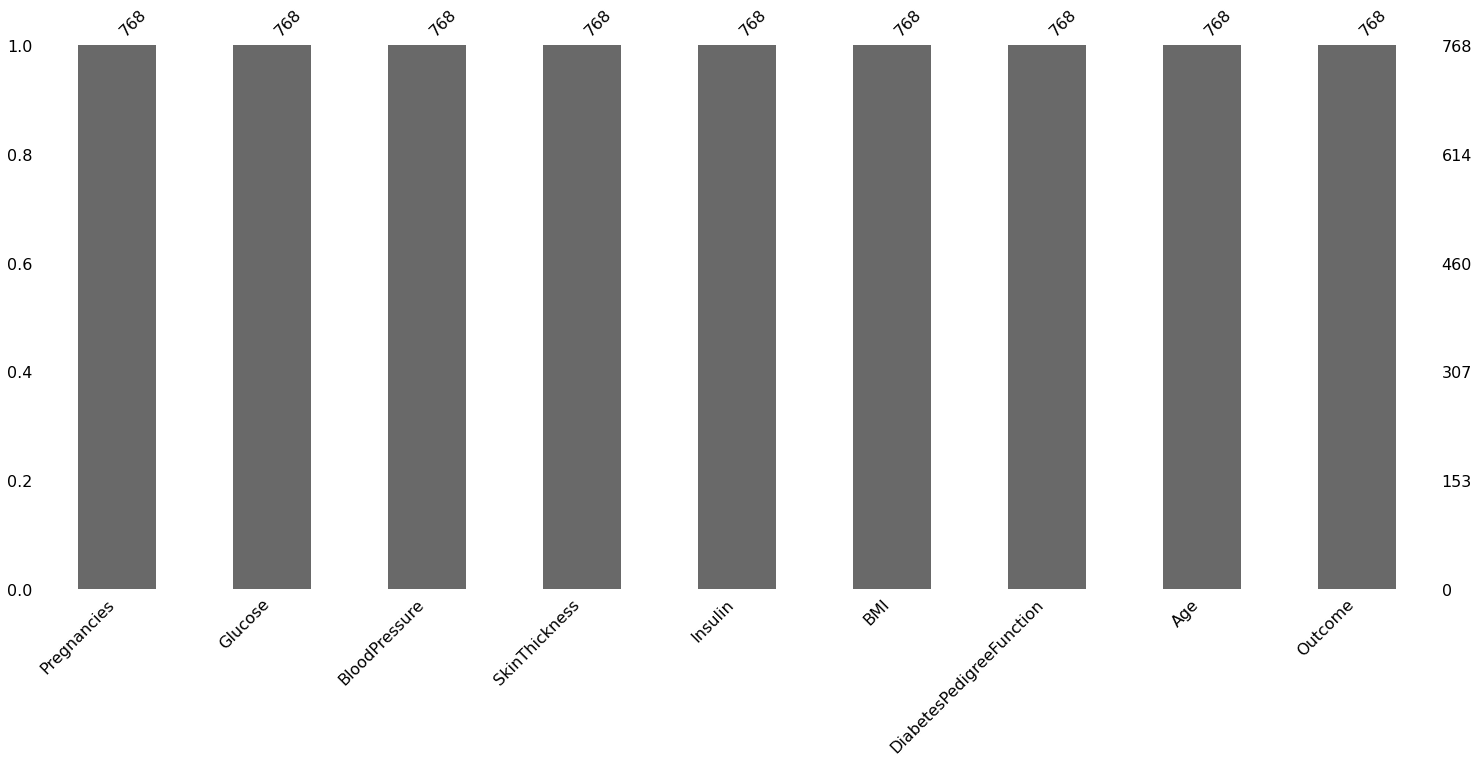

In [47]:
#ploting Null count analysis plot
p = msno.bar(data)

#### visualizing the presence of missing values in the dataset.

0    500
1    268
Name: Outcome, dtype: int64


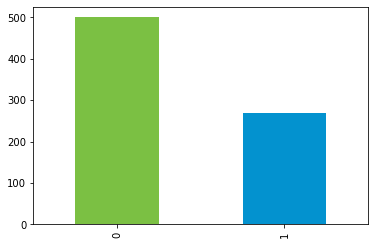

In [48]:
#cheacking the balance the data by plotting the count of outcome by their value
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data["Outcome"].value_counts())
p = data["Outcome"].value_counts().plot(kind="bar", color=colors)

#### The resulting bar plot provides a visual representation of the distribution of outcome values, helping to assess the balance or imbalance in the dataset. 

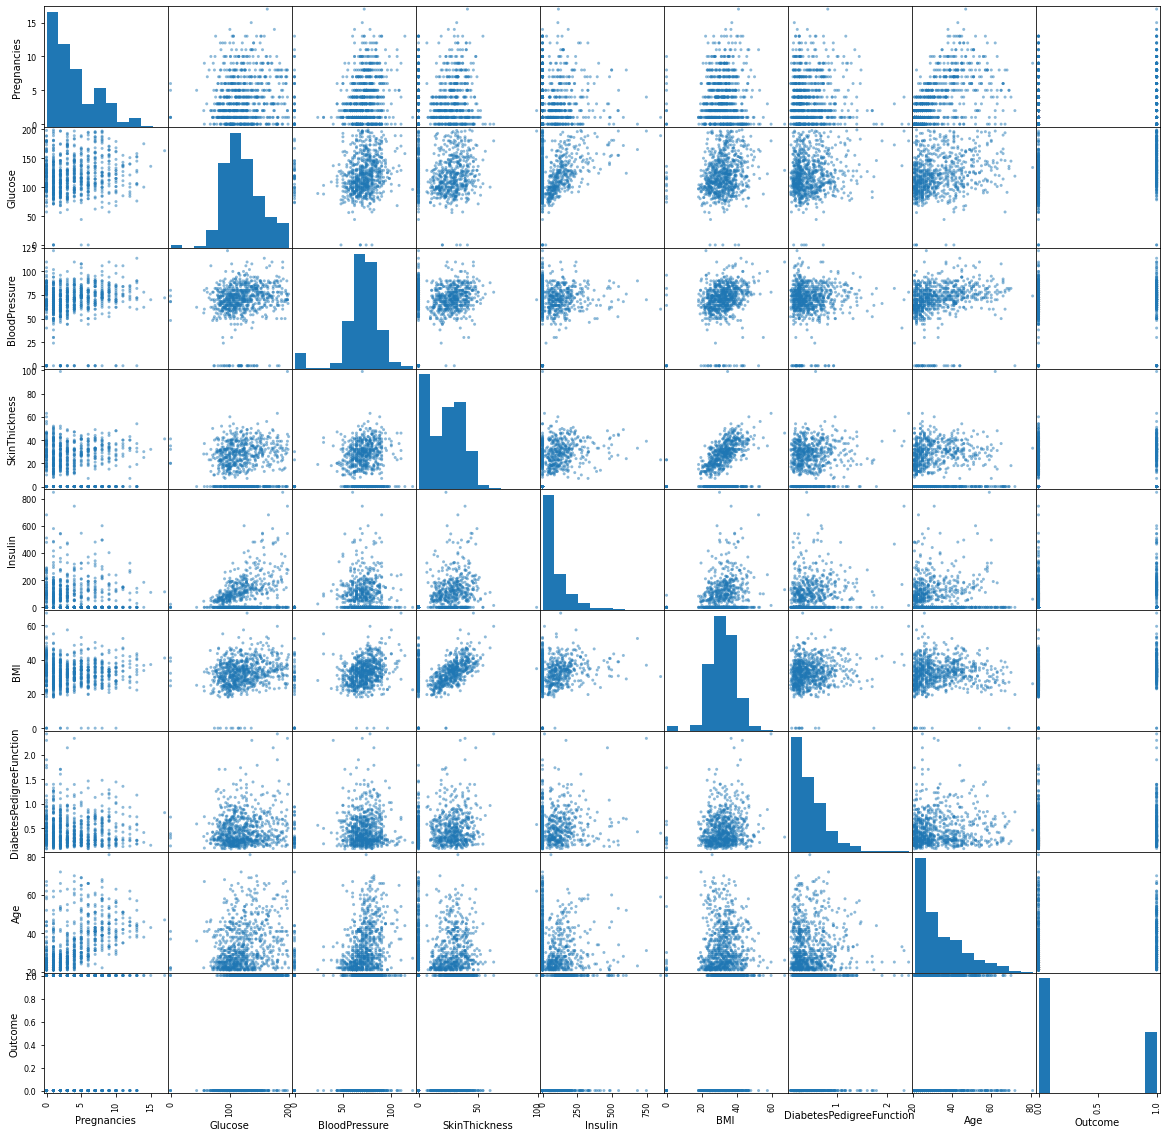

In [50]:
# Plot scatter matrix of uncleaned data
p = scatter_matrix(data, figsize=(20, 20))

plt.show()

#### The scatter matrix offers a comprehensive visual overview, with each subplot displaying the correlation between different pairs of variables. 

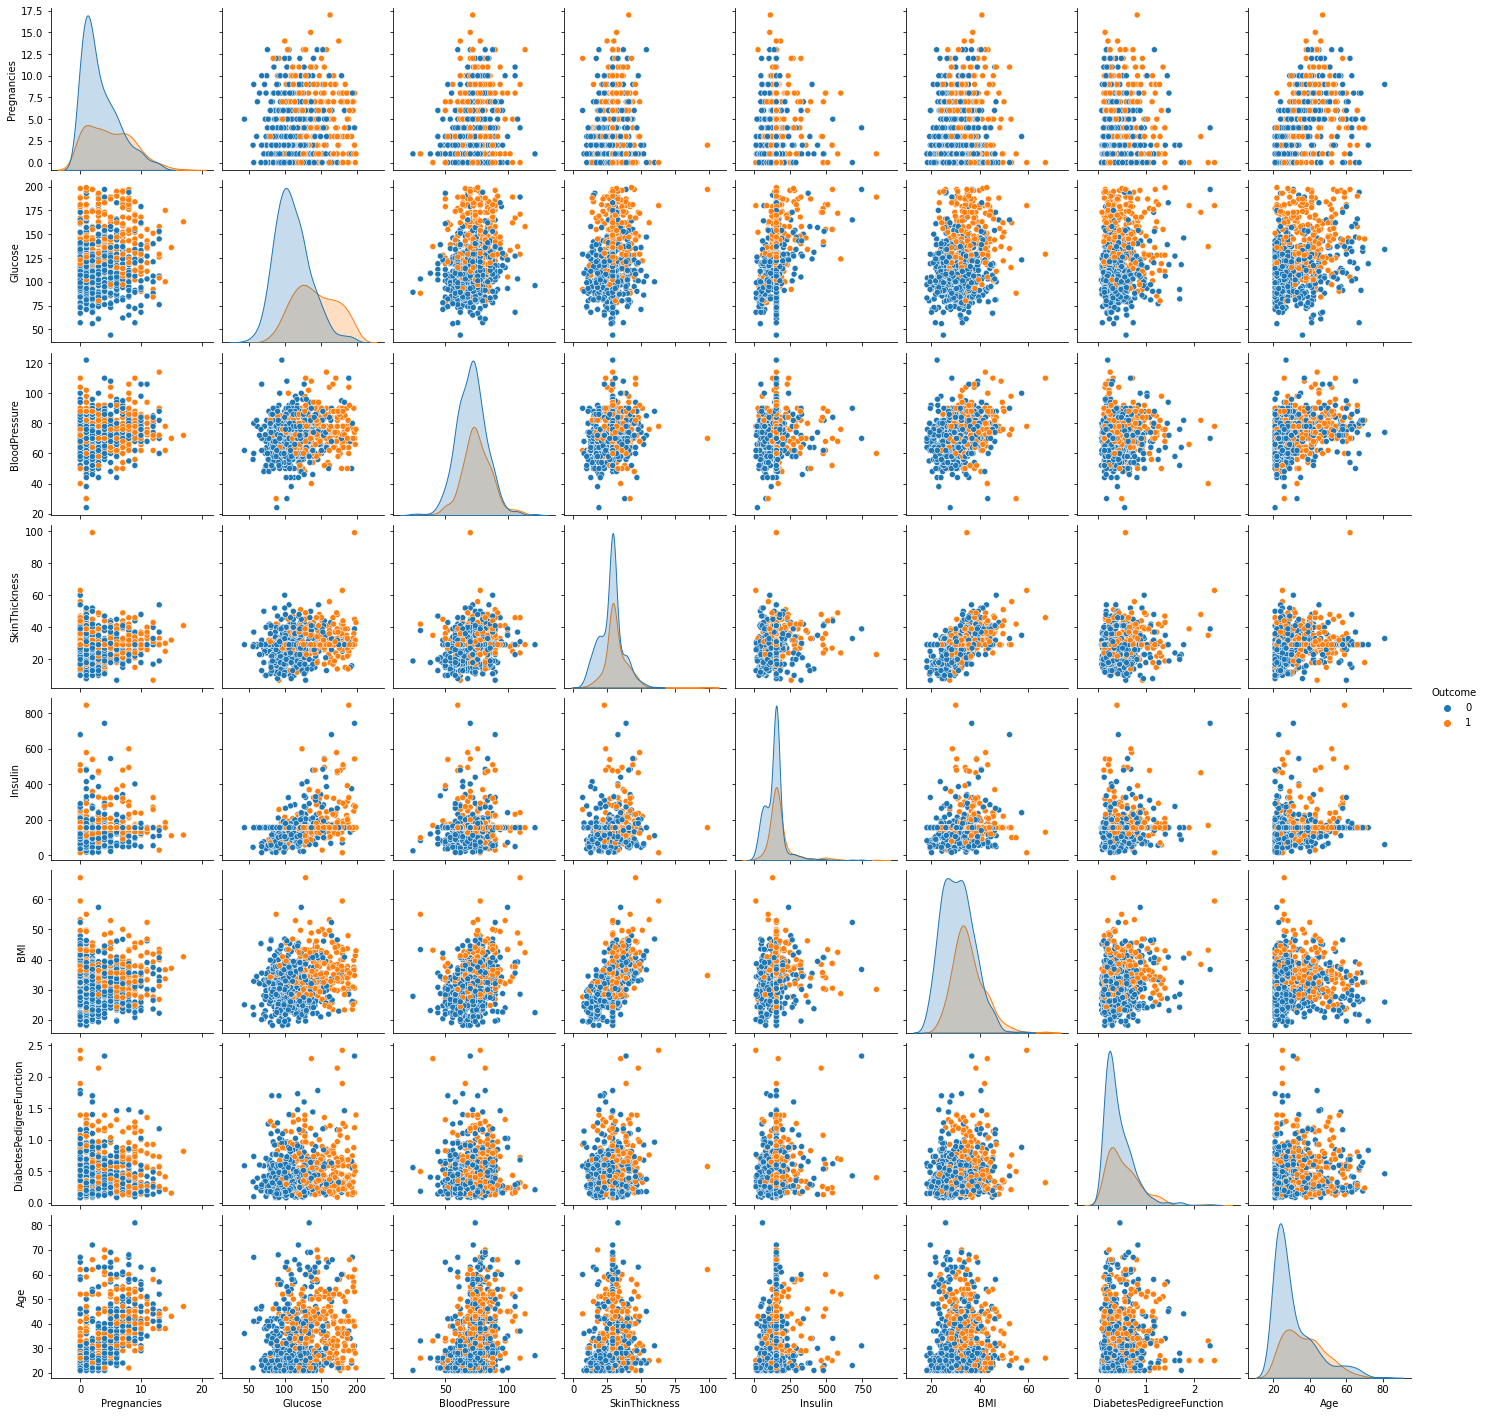

In [51]:
#plotting pair for the data
sns.pairplot(data1, hue= 'Outcome')
plt.show()

#### Each scatterplot matrix cell represents the relationship between two variables, while the 'Outcome' variable is differentiated by color. 

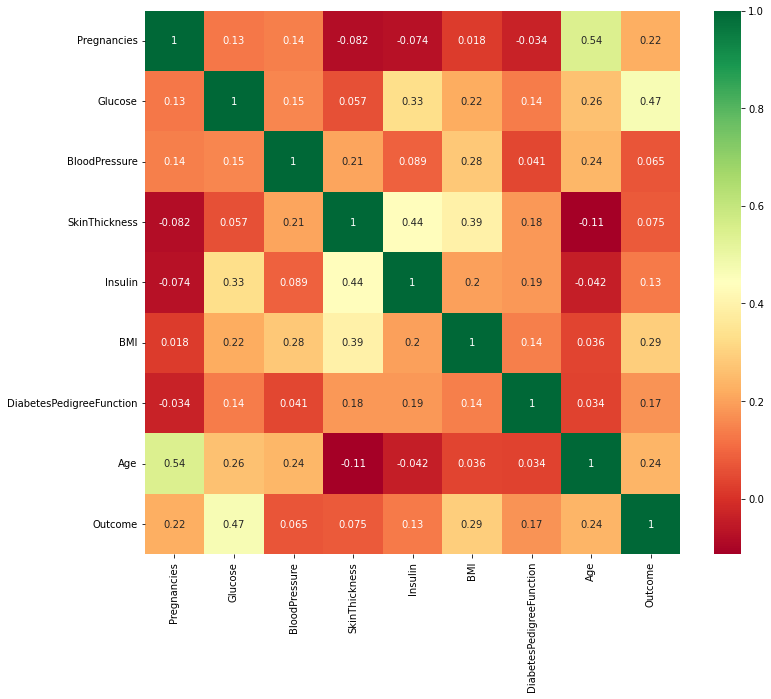

In [53]:
#plotting the heatmap of correlation between all the feature before the cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(data.corr(), annot = True, cmap="RdYlGn")

#### The 'Outcome' variable is differentiated by color, providing insights into potential patterns and associations between features in relation to the outcome.

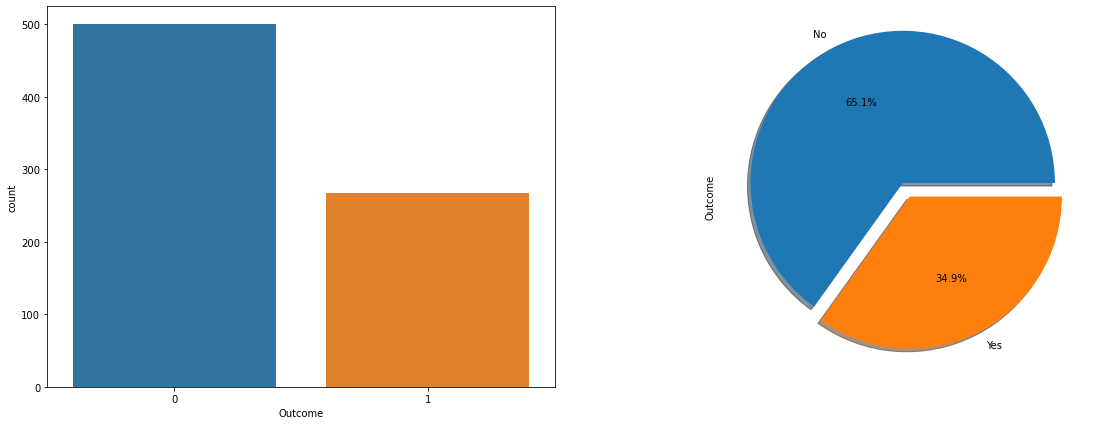

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=data, x="Outcome", ax=ax[0])

data["Outcome"].value_counts().plot.pie(
    explode=[0.1, 0], autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1]
)

plt.show()

#### A visual representation of the distribution of the 'Outcome' variable in the dataset using a count plot and a pie chart.The count plot on the left provides a bar chart illustrating the count of each outcome category. the pie chart on the right offers a visual representation of the proportion of each outcome category in the dataset. 

In [54]:
#Store Feature matrix in X and Response(Target) In Vectore y
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [27]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [28]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
#Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [30]:
#Scikit-Learn Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [31]:
pipeline_lr = Pipeline([('scalar1', StandardScaler()),
                        ('lr_classifier', LogisticRegression())])

pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                        ('knn_classifier', KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3', StandardScaler()),
                        ('svc_classifier', SVC())])

pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier(max_depth=3))])
pipeline_gbc = Pipeline([('gbc_classifier', GradientBoostingClassifier())])
                      

In [32]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc]
pipelines

[Pipeline(steps=[('scalar1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scalar2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scalar3', StandardScaler()), ('svc_classifier', SVC())]),
 Pipeline(steps=[('dt_classifier', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier(max_depth=3))]),
 Pipeline(steps=[('gbc_classifier', GradientBoostingClassifier())])]

In [33]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [34]:
pipe_dict = {0:'LR',
            1:'KNN',
            2:'SVC',
            3:'DT',
            4:'RF',
            5:'GBC'}
pipe_dict

{0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}

In [35]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)*100))

LR Test Accuracy:75.32467532467533
KNN Test Accuracy:69.48051948051948
SVC Test Accuracy:73.37662337662337
DT Test Accuracy:75.97402597402598
RF Test Accuracy:79.22077922077922
GBC Test Accuracy:74.67532467532467


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [38]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(X,y)

RandomForestClassifier(max_depth=3)

In [39]:
new_data = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148.0],
    'BloodPressure': [72.0],
    'SkinThickness': [35.0],
    'Insulin': [79.799479],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50],
}, index=[0])


In [40]:
p = rf.predict(new_data)
p

array([1], dtype=int64)

In [41]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

diabetic


In [42]:
#save Model Using Joblib
import joblib
joblib.dump(rf,'model_joblib_diabetes')

['model_joblib_diabetes']

In [43]:
model =joblib.load('model_joblib_diabetes')
model.predict(new_data)

array([1], dtype=int64)

In [44]:
#GUI

In [ ]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *

def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    
    model = joblib.load('model_joblib_diabetes')
    result= model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    
    if result == 0:
        Label(master, text='Non-Diabetic').grid(row=31)
    else:
        Label(master, text='Diabetic').grid(row=31)

# Create the Tk instance
master = Tk()
master.title("diabetes Prediction Using Machine Learning")

Label(master, text="diabetes Prediction Using Machine Learning",
      bg="black", fg="white").grid(row=0, columnspan=2)

Label(master, text="Pregnancies").grid(row=1)
Label(master, text="Glucose").grid(row=2)
Label(master, text="Enter the value of BloodPressure").grid(row=3)
Label(master, text="Enter the value of SkinThickness").grid(row=4)
Label(master, text="Enter the value of Insulin").grid(row=5)
Label(master, text="Enter the value of BMI").grid(row=6)
Label(master, text="Enter the value of DiabetesPedigreeFunction").grid(row=7)
Label(master, text="Enter the value of Age").grid(row=8)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

# Place entries on the grid
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)

# Button to trigger prediction
Button(master, text='Predict', command=show_entry_fields).grid(row=9, column=0, columnspan=2)

# Start the Tkinter event loop
master.mainloop()


C:\Users\jivan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
